In [1]:
print("start")

start


In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as ws
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv("weather.csv")

In [4]:
df.head()

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0,Cold
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1,Warm
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1,Normal
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1,Cold
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1,Cold


In [5]:
def clear_name(name):
  return name.strip().lower().replace(" ", "_")

In [7]:

df.rename(columns=clear_name, inplace = True)

In [8]:
df.head()

,temperature_c,humidity,wind_speed_kmh,wind_bearing_degrees,visibility_km,pressure_millibars,rain,description
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0,Cold
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1,Warm
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1,Normal
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1,Cold
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1,Cold


In [9]:
df.isna().sum()

temperature_c           0
humidity                0
wind_speed_kmh          0
wind_bearing_degrees    0
visibility_km           0
pressure_millibars      0
rain                    0
description             0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
lal = LabelEncoder()


In [11]:
# Splitting the data 
X = df.drop("description", axis = 1)
y = df["description"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2, stratify = y)

In [17]:
encoded_label = lal.fit_transform(y)
df.description = encoded_label

In [12]:
# Visualizing the classes

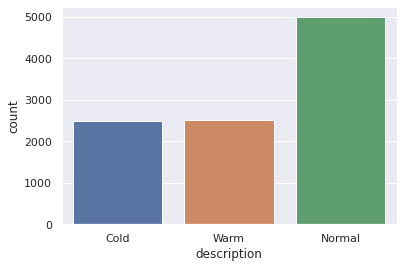

In [13]:
sns.set()
sns.countplot(df.description)
plt.show()

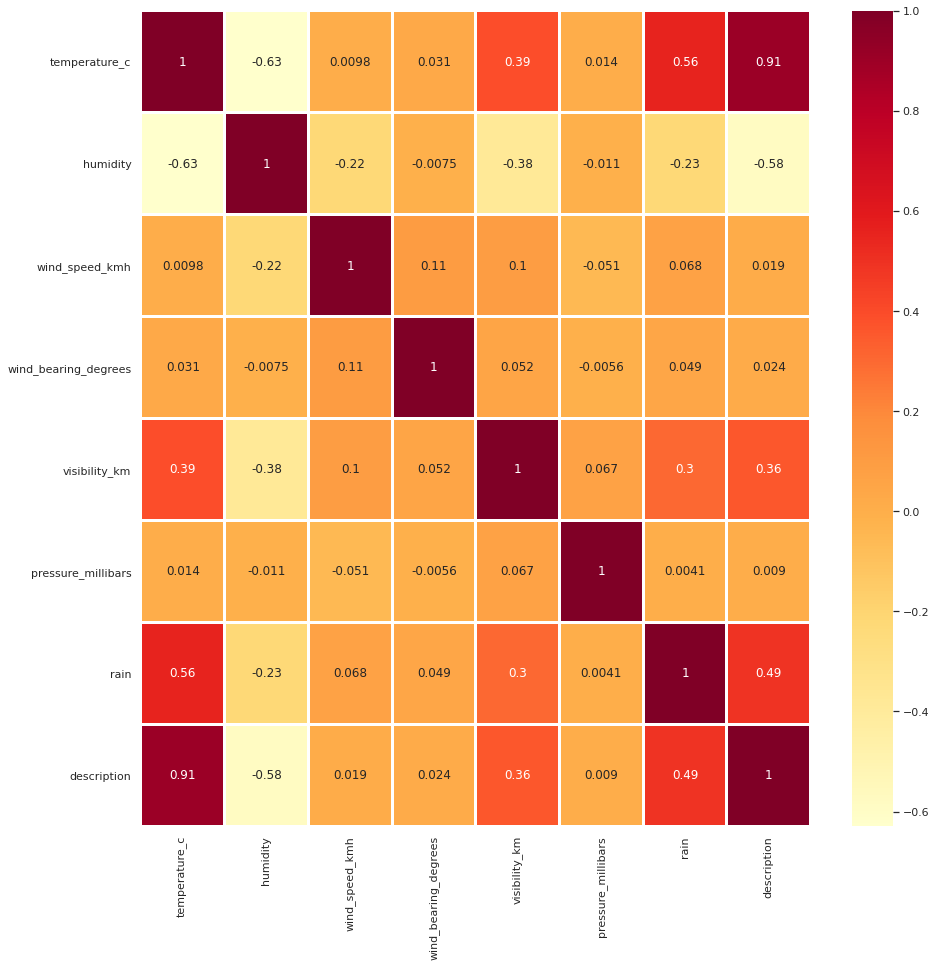

In [18]:
# Visualize the dataset 
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot = True, linewidths=2, cmap="YlOrRd")
plt.show()

In [20]:
top_correlation_feat = df[["temperature_c", "humidity", "visibility_km", "rain"]]

In [21]:
# Encoding the target
lable_encoder = LabelEncoder()
y_train = lable_encoder.fit_transform(y_train)
y_test = lable_encoder.transform(y_test)

In [22]:
# Fitting the Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
print(logreg.score(X_train, y_train))

0.9705
0.9705


In [24]:
y_pred = logreg.predict(X_test)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       500
           1       0.97      0.98      0.97       999
           2       0.95      0.95      0.95       501

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



In [27]:
 confusion_matrix(y_test, y_pred) 

array([[489,   8,   3],
       [  0, 976,  23],
       [  0,  25, 476]])

In [28]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [29]:
grid = {'penalty': ['l1', 'l2'],

        'C': np.linspace(1, 10, 10),

        'solver': ['liblinear']}
gsv = GridSearchCV(logreg, grid, cv = 5)

In [30]:
gsv.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [31]:
gsv.best_params_

{'C': 5.0, 'penalty': 'l1', 'solver': 'liblinear'}

In [32]:
gsv.best_score_

0.9881249999999999

In [34]:
logreg2 = LogisticRegression(C=  5.0, penalty= 'l1', solver= 'liblinear')

In [35]:
logreg2.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=5.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
y_pred_new = logreg2.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score
print("Accuracy score of Logistic Regression on  testing score is ", round(accuracy_score(y_test, y_pred_new)*100, 2))

Accuracy score of Logistic Regression on  testing score is  99.05


In [42]:
print(confusion_matrix(y_test, y_pred_new))

[[496   4   0]
 [  0 995   4]
 [  0  11 490]]


** :>) Done IT text**

In [51]:
# Running the other models with default setting
for model in [GaussianNB(), RandomForestClassifier(), DecisionTreeClassifier()]:
  model.fit(X_train, y_train)
  
  y_pred = model.predict(X_test)
  acc_score = accuracy_score(y_test, y_pred)
  print(model.__class__.__name__, end = " \t ")
  print(acc_score)

GaussianNB 	 0.819
RandomForestClassifier 	 0.9995
DecisionTreeClassifier 	 0.9995
